Importation des datasets

In [4]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

data_csv=pd.read_csv('./Bdd/credit_immo/credit_immo.csv',sep=',')
print(data_csv)

data_json=pd.read_json('./Bdd/credit_immo/credit_immo.json')
print(data_json)

data_xls=pd.read_excel('./Bdd/credit_immo/credit_immo.xls')
print(data_xls)

      ID_NOM  Niv_Etude_Bac  age contrat_de_travail  Salaire  \
0       jean            3.0   45                CDI    40000   
1    VANESSA            5.0   28                CDI    30500   
2   TARCISSE            0.0   55                CDI    28000   
3    TIBAULT            4.0   23                CDD    15000   
4      GILES            0.0   33                CDD    27000   
5      ETHAN            0.0   41            INTERIM    40000   
6    LILIANE           -1.0   29                CDI    50000   
7      GLODI           -3.0   24            INTERIM    29000   
8   FLORIANE            NaN   26                CDI    44000   
9      MARIE            3.0   37                CDI    45800   
10   BAKAMBU            2.0   40                CDI    60000   
11     FATOU            0.0   38                CDD    26000   
12      WUAN           -3.0   39            INTERIM    29000   
13      HUGO            0.0   31                CDI    43000   
14    JOSEPH            1.0   70        

Création d'un dataframe

In [5]:
d = {'taux_de_ventes': [], 'croissance_vente': [],'ratio_benefice':[],'ratio_perte':[]}
ar=np.random.randint(1,100,size=(6,4))
df = pd.DataFrame(ar, columns = d,dtype = int)
a=df.shape
print(a)
print(df)

(6, 4)
   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
0              11                89               6           59
1              95                74              55           32
2              28                99              79           85
3              83                75              27            1
4              72                44              66           54
5              81                89              40           36


En utilisant la fonction dataset.reindex() et dataset.isnull(), introduire des données manquantes et récupérer les indices des valeurs manquantes. Puis remplacez les valeurs manquantes par 0 par exemple. Puis supprimez ces valeurs manquantes.

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,11,89,6,59
1,95,74,55,32
2,28,99,79,85
3,83,75,27,1
4,72,44,66,54
5,81,89,40,36


3. Traitement de la donnée

On récupère les colonnes numériques pour remplacer les valeurs manquantes(data.select_dtypes(include=numerics)) par les moyennes (SimpleImputer). De ce fait, on influe pas sur la moyenne de la colonne.
On réintègre ensuite les modifications dans la dataframe de base.

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
data=pd.read_csv('./Bdd/credit_immo/credit_immo.csv',sep=',')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num= data.select_dtypes(include=numerics)
newdata=SimpleImputer(missing_values=np.nan,strategy="mean").fit(data_num)
data[data_num.columns]=newdata.transform(data_num)
print(data)

      ID_NOM  Niv_Etude_Bac   age contrat_de_travail   Salaire  \
0       jean       3.000000  45.0                CDI   40000.0   
1    VANESSA       5.000000  28.0                CDI   30500.0   
2   TARCISSE       0.000000  55.0                CDI   28000.0   
3    TIBAULT       4.000000  23.0                CDD   15000.0   
4      GILES       0.000000  33.0                CDD   27000.0   
5      ETHAN       0.000000  41.0            INTERIM   40000.0   
6    LILIANE      -1.000000  29.0                CDI   50000.0   
7      GLODI      -3.000000  24.0            INTERIM   29000.0   
8   FLORIANE       1.444444  26.0                CDI   44000.0   
9      MARIE       3.000000  37.0                CDI   45800.0   
10   BAKAMBU       2.000000  40.0                CDI   60000.0   
11     FATOU       0.000000  38.0                CDD   26000.0   
12      WUAN      -3.000000  39.0            INTERIM   29000.0   
13      HUGO       0.000000  31.0                CDI   43000.0   
14    JOSE

On va maintenant traiter les données non numériques avec LabelEncoder, afin d'attribuer à chaque valeur un id numérique exploitable dans les calculs.

In [8]:
from sklearn import preprocessing

data_non_num= data.select_dtypes(include=object).columns
print(data_non_num)
for i in data_non_num :
    data[i]= preprocessing.LabelEncoder().fit_transform(data[i])
print(data)

Index(['ID_NOM', 'contrat_de_travail', 'etat_civile', 'Solvable'], dtype='object')
    ID_NOM  Niv_Etude_Bac   age  contrat_de_travail   Salaire  \
0       18       3.000000  45.0                   1   40000.0   
1       16       5.000000  28.0                   1   30500.0   
2       14       0.000000  55.0                   1   28000.0   
3       15       4.000000  23.0                   0   15000.0   
4        7       0.000000  33.0                   0   27000.0   
5        2       0.000000  41.0                   3   40000.0   
6       12      -1.000000  29.0                   1   50000.0   
7        8      -3.000000  24.0                   3   29000.0   
8        5       1.444444  26.0                   1   44000.0   
9       13       3.000000  37.0                   1   45800.0   
10       0       2.000000  40.0                   1   60000.0   
11       3       0.000000  38.0                   0   26000.0   
12      17      -3.000000  39.0                   3   29000.0   
13     

Il est maintenant temps de définir à partir de nos données la partie servant à l'apprentissage et celle pour le test une fois l'apprentissage terminé.

In [9]:
from sklearn.model_selection import train_test_split
data_x=data.drop('Solvable', 1)
X_train, X_test, y_train, y_test = train_test_split(data_x, data['Solvable'], train_size=0.8)
print(X_train)

    ID_NOM  Niv_Etude_Bac   age  contrat_de_travail   Salaire  \
11       3       0.000000  38.0                   0   26000.0   
2       14       0.000000  55.0                   1   28000.0   
9       13       3.000000  37.0                   1   45800.0   
17       6       3.000000  23.0                   1  100000.0   
3       15       4.000000  23.0                   0   15000.0   
8        5       1.444444  26.0                   1   44000.0   
12      17      -3.000000  39.0                   3   29000.0   
7        8      -3.000000  24.0                   3   29000.0   
10       0       2.000000  40.0                   1   60000.0   
16       4       8.000000  46.0                   1   80000.0   
15       1       0.000000  42.0                   2   70000.0   
14      11       1.000000  70.0                   0   45000.0   
1       16       5.000000  28.0                   1   30500.0   
18       9       4.000000  32.0                   1   21000.0   
6       12      -1.000000

Maintenant, nous standardisons les données.

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled =scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled =scaler.transform(X_test)
# scaler = preprocessing.StandardScaler().fit(y_train)
#y_train_scaled =scaler.transform(y_train)
print(y_train)
X_train_scaled.mean(axis=0)
X_train_scaled.std(axis=0)

11    0
2     0
9     1
17    1
3     1
8     1
12    0
7     0
10    1
16    1
15    0
14    0
1     1
18    1
6     0
Name: Solvable, dtype: int32


array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Nous avons préparé nos données (pré-traitement).

4. Visualisation

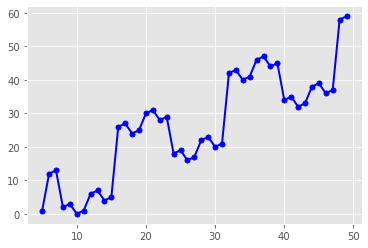

In [11]:
from matplotlib import pyplot
data2=pd.read_csv('./Bdd/Montant_Temps.csv',sep=',')
x=data2.Montant_du_capitale
# x=x.iloc[]
y=data2.Temps
# y=y.iloc[]
plt.style.use('ggplot')
plt.plot(y, x, color='b', marker='.', linestyle='-',
     linewidth=2, markersize=10)

[-1.10187678 -0.56395427  0.09517816 -1.28142321 -0.81911304  0.01254253
 -1.41421356  1.99021042 -0.89544477]


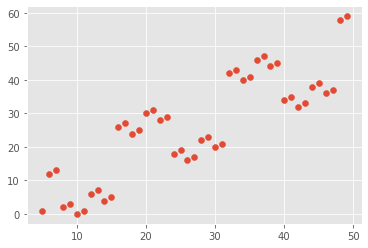

In [12]:
# plt.scatter(x=X_train_scaled,y=y_train_scaled)
print(X_train_scaled[0])
# print(y_train)
plt.scatter(y,x)

5. Analyse de données
5.1 Mesure de tendance centrale

In [13]:
data3=pd.read_csv('./Bdd/tendance_centrale.csv',sep=',')
print(data3)
data3.describe()

           Nom  Age  Rating
0      ANATOLE   55    4.53
1     Vincent    59    3.54
2      Brenda    55    3.98
3    Philippe    53    5.59
4      Michel    30    3.50
5     Tillier    59    4.90
6   Blanchard    53    3.80
7        perez   34    3.78
8        théo    40    5.98
9     cyprien    30    4.80
10   manuella    53    4.30
11   LEGGERET    49    3.95
12       perez   34    3.78
13    sestre     40    5.98
14      Fazal    30    4.80
15      Donald   53    4.30
16     Estelle   49    3.95


,Age,Rating
count,17.000000,17.000000
mean,45.647059,4.438824
std,10.723462,0.800390
min,30.000000,3.500000
25%,34.000000,3.800000
50%,49.000000,4.300000
75%,53.000000,4.800000
max,59.000000,5.980000


5.2 Analyse de la variance

In [14]:
import scipy.stats as stats
liste=[]
a = data3['Age'].unique()
for i in data3['Age'].unique():
    a = data3[data3['Age'] == i]['Rating']
    # to_liste() pour apprendre dans 1 liste
    liste.append(a.to_list())
liste

[[4.53, 3.98],
 [3.54, 4.9],
 [5.59, 3.8, 4.3, 4.3],
 [3.5, 4.8, 4.8],
 [3.78, 3.78],
 [5.98, 5.98],
 [3.95, 3.95]]

5.3 Analyse de corrélations

In [15]:
data_iris=pd.read_csv('./Bdd/iris.csv',sep=',')
# data_iris_non= data_iris.select_dtypes(include=object).columns
# for i in data_iris_non :
#     data_iris[i]= preprocessing.LabelEncoder().fit_transform(data_iris[i])
print(data_iris)

     longueur_sepal  largeur_sepal  longueur_petal  largeur_petal     espece
0               5.1            3.5             1.4            0.2     setosa
1               4.9            3.0             1.4            0.2     setosa
2               4.7            3.2             1.3            0.2     setosa
3               4.6            3.1             1.5            0.2     setosa
4               5.0            3.6             1.4            0.2     setosa
..              ...            ...             ...            ...        ...
145             6.7            3.0             5.2            2.3  virginica
146             6.3            2.5             5.0            1.9  virginica
147             6.5            3.0             5.2            2.0  virginica
148             6.2            3.4             5.4            2.3  virginica
149             5.9            3.0             5.1            1.8  virginica

[150 rows x 5 columns]


Matrice de covariance :
                 longueur_sepal  largeur_sepal  longueur_petal  largeur_petal
longueur_sepal        0.685694      -0.042434        1.274315       0.516271
largeur_sepal        -0.042434       0.189979       -0.329656      -0.121639
longueur_petal        1.274315      -0.329656        3.116278       1.295609
largeur_petal         0.516271      -0.121639        1.295609       0.581006
Matrice de correlation :
                 longueur_sepal  largeur_sepal  longueur_petal  largeur_petal
longueur_sepal        1.000000      -0.117570        0.871754       0.817941
largeur_sepal        -0.117570       1.000000       -0.428440      -0.366126
longueur_petal        0.871754      -0.428440        1.000000       0.962865
largeur_petal         0.817941      -0.366126        0.962865       1.000000


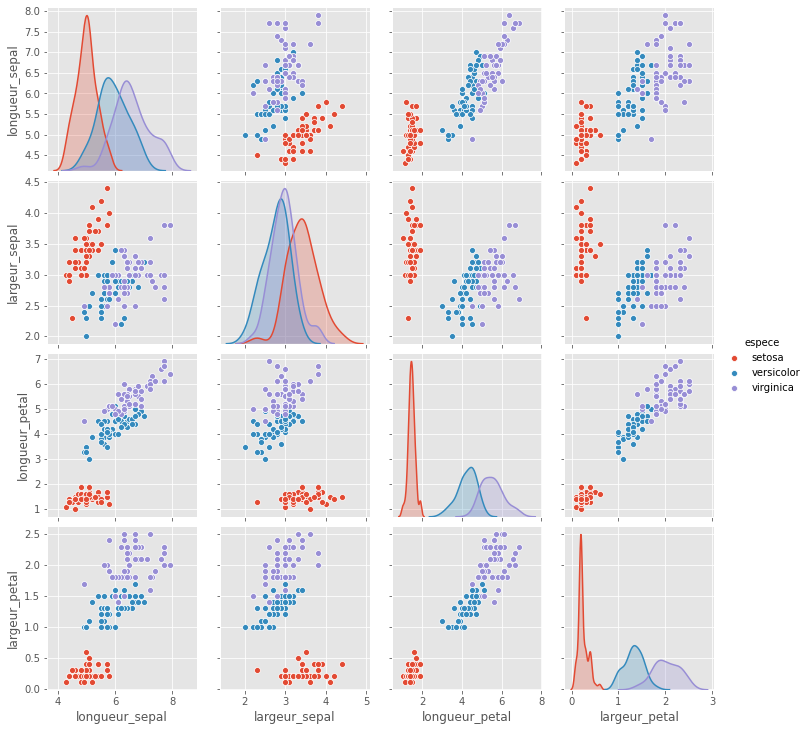

In [16]:
x=data_iris['longueur_petal']
y=data_iris['largeur_petal']
z=data_iris['longueur_sepal']
w=data_iris['largeur_sepal']
v=data_iris['espece']
print ('Matrice de covariance :\n', data_iris.cov())
print ('Matrice de correlation :\n', data_iris.corr())
import seaborn as sns
sns.pairplot(data_iris, hue='espece')

De ces graphes, nous pouvons observer différents phénomènes :
- La longueur et la largeur des pétales sont fortement corrélées.
- Il semble y avoir une faible corrélation entre les longueurs et largeurs de sépales. Nous allons d'ailleurs effectuer un test de Pearson pour avoir une confirmation.
- Une des espèces (setosa) présente des pétales de dimensions bien inférieures aux autres espèces.

5.4 Analyse mathématique

In [17]:
sci.stats.pearsonr(z, w)
# sci.stats.pearsonr(x, v)

(-0.11756978413300204, 0.15189826071144918)

p > 0.5
Les dimensions des sépales ne sont apparement pas corrélées, ce qu'on pouvait deviner graphiquement.

In [18]:
sci.stats.pearsonr(x, y)

(0.962865431402796, 4.6750039073285846e-86)

Au contraire, lorsqu'on observe les dimensions des pétales, la corrélation est forte, et la valeur de p << 0,5.
Nous avons confirmation d'une réelle corrélation entre les dimensions des pétales.